In [1]:
import pandas as pd
import numpy as np

# load
data = pd.read_excel('exams.xlsx')
data.head()

,Exam1,Exam2,pass
0,35.234,78.123,0
1,36.324,34.432,0
2,37.414,72.001,0
3,60.324,88.123,1
4,79.234,75.123,1


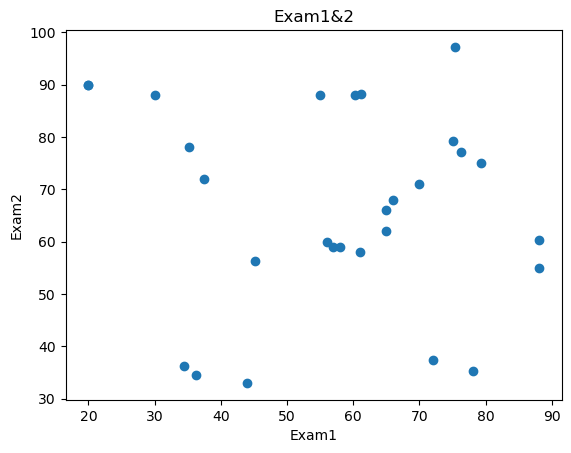

In [2]:
# visualize
from matplotlib import pyplot as plt
fig1 = plt.figure()
plt.scatter(data.loc[:,'Exam1'],data.loc[:,'Exam2'])
plt.title("Exam1&2")
plt.xlabel("Exam1")
plt.ylabel("Exam2")
plt.show()

In [3]:
mask = data.loc[:,'pass']==1
print(mask)

0     False
1     False
2     False
3      True
4      True
5     False
6      True
7      True
8      True
9     False
10    False
11    False
12     True
13     True
14    False
15    False
16    False
17     True
18     True
19    False
20    False
21    False
22    False
23     True
24     True
25    False
26    False
27    False
Name: pass, dtype: bool


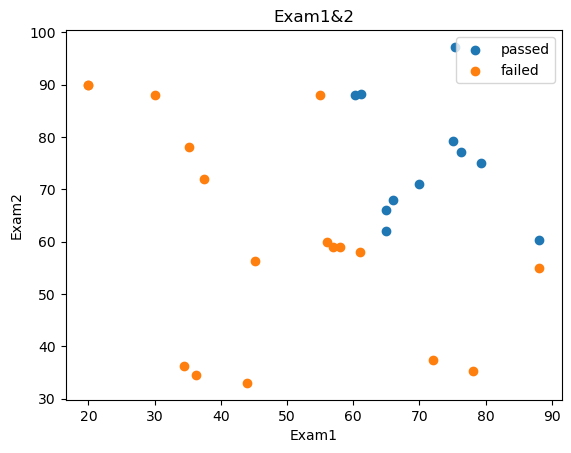

In [4]:
fig2 = plt.figure()
passed = plt.scatter(data.loc[:,'Exam1'][mask],data.loc[:,'Exam2'][mask])
failed = plt.scatter(data.loc[:,'Exam1'][~mask],data.loc[:,'Exam2'][~mask])
plt.title("Exam1&2")
plt.xlabel("Exam1")
plt.ylabel("Exam2")
plt.legend((passed,failed),('passed','failed'))
plt.show()

In [10]:
x = data.drop('pass',axis=1)
y = data.loc[:,'pass']

x1 = data.loc[:,'Exam1']
x2 = data.loc[:,'Exam2']
print(x.shape,y.shape)

(28, 2) (28,)


In [11]:
# train model
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x,y)

LogisticRegression()

In [12]:
# predict

y_predict = LR.predict(x)
print(y_predict)

[0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1]


In [14]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y,y_predict)
accuracy

0.8571428571428571

In [21]:
y_test = LR.predict([[50,61]])
print("passed" if y_test==1 else "failed") 

failed


/Users/zhanghao/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [22]:
LR.coef_

array([[0.15276158, 0.13813297]])

In [23]:
LR.intercept_

array([-19.28002497])

In [24]:
theta0 = LR.intercept_
theta1, theta2 = LR.coef_[0][0],LR.coef_[0][1]
print(theta0,theta1,theta2)

[-19.28002497] 0.15276157530679998 0.1381329665861656


In [25]:
x2_new = -(theta0+theta1*x1)/theta2
print(x2_new)

0     100.610477
1      99.405043
2      98.199610
3      72.863386
4      51.950772
5      89.674208
6      71.858121
7      56.288121
8      55.291703
9      53.179430
10    101.497410
11     59.949764
12     42.120406
13     56.497137
14     77.645308
15     75.433503
16     76.539406
17     67.692187
18     62.162675
19    117.457793
20     72.115796
21     42.256432
22     90.916137
23     66.586284
24     67.692187
25    117.457793
26    106.398770
27     78.751210
Name: Exam1, dtype: float64


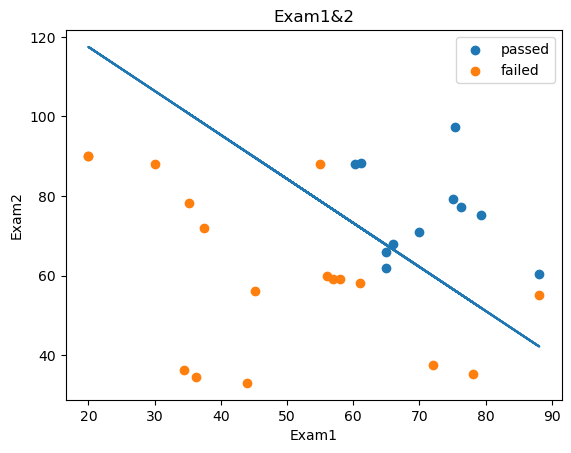

In [27]:
fig3 = plt.figure()
plt.plot(x1,x2_new)
plt.plot()

passed = plt.scatter(data.loc[:,'Exam1'][mask],data.loc[:,'Exam2'][mask])
failed = plt.scatter(data.loc[:,'Exam1'][~mask],data.loc[:,'Exam2'][~mask])
plt.title("Exam1&2")
plt.xlabel("Exam1")
plt.ylabel("Exam2")
plt.legend((passed,failed),('passed','failed'))
plt.show()

In [31]:
# create new data
x1_2 = x1*x1
x2_2 = x2*x2
x1_x2 = x1*x2

In [34]:
x_new = {'x1':x1,'x2':x2,'x1_2':x1_2,'x2_2':x2_2,'x1_x2':x1_x2}
x_new = pd.DataFrame(x_new)
x_new

,x1,x2,x1_2,x2_2,x1_x2
0,35.234,78.123,1241.434756,6103.203129,2752.585782
1,36.324,34.432,1319.432976,1185.562624,1250.707968
2,37.414,72.001,1399.807396,5184.144001,2693.845414
3,60.324,88.123,3638.984976,7765.663129,5315.931852
4,79.234,75.123,6278.026756,5643.465129,5952.295782
5,45.123,56.213,2036.085129,3159.901369,2536.499199
6,61.233,88.324,3749.480289,7801.128976,5408.343492
7,75.312,97.234,5671.897344,9454.450756,7322.887008
8,76.213,77.123,5808.421369,5947.957129,5877.775199
9,78.123,35.234,6103.203129,1241.434756,2752.585782


In [36]:
LR2 = LogisticRegression()
LR2.fit(x_new,y)

/Users/zhanghao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
y2_predic = LR2.predict(x_new)
accuracy2 = accuracy_score(y,y2_predic)
accuracy2

1.0

In [51]:
x1_new = x1.sort_values()
print(x1,x1_new)

0     35.234
1     36.324
2     37.414
3     60.324
4     79.234
5     45.123
6     61.233
7     75.312
8     76.213
9     78.123
10    34.432
11    72.001
12    88.123
13    75.123
14    56.000
15    58.000
16    57.000
17    65.000
18    70.000
19    20.000
20    61.000
21    88.000
22    44.000
23    66.000
24    65.000
25    20.000
26    30.000
27    55.000
Name: Exam1, dtype: float64 25    20.000
19    20.000
26    30.000
10    34.432
0     35.234
1     36.324
2     37.414
22    44.000
5     45.123
27    55.000
14    56.000
16    57.000
15    58.000
3     60.324
20    61.000
6     61.233
24    65.000
17    65.000
23    66.000
18    70.000
11    72.001
13    75.123
7     75.312
8     76.213
9     78.123
4     79.234
21    88.000
12    88.123
Name: Exam1, dtype: float64


In [43]:
t0 = LR2.intercept_
t1,t2,t3,t4,t5 = LR2.coef_[0][0], LR2.coef_[0][1],LR2.coef_[0][2],LR2.coef_[0][3],LR2.coef_[0][4]

In [55]:
a = t4
b = t5*x1_new+t2
c = t0+t1*x1_new+t3*x1_new*x1_new
x2_new_boundary = (-b+np.sqrt(b*b-4*a*c))/(2*a)

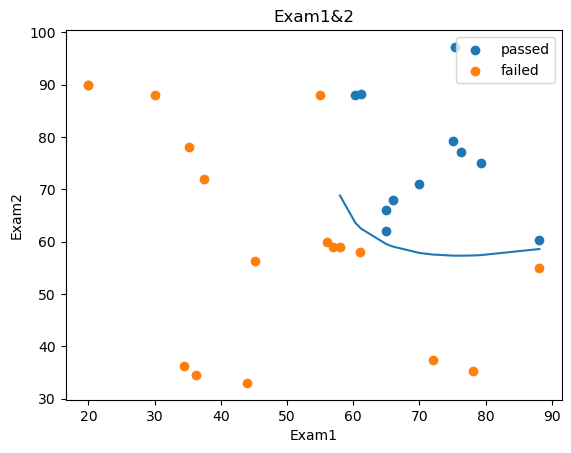

In [58]:
fig4 = plt.figure()
plt.plot(x1_new,x2_new_boundary)

passed = plt.scatter(data.loc[:,'Exam1'][mask],data.loc[:,'Exam2'][mask])
failed = plt.scatter(data.loc[:,'Exam1'][~mask],data.loc[:,'Exam2'][~mask])
plt.title("Exam1&2")
plt.xlabel("Exam1")
plt.ylabel("Exam2")
plt.legend((passed,failed),('passed','failed'))
plt.show()